## Neural Network
### on the Boston Housing data
### using sklearn

The Boston Housing data was retrieved from: [this GitHub](https://vincentarelbundock.github.io/Rdatasets/datasets.html) The data set is in R package MASS.

The file has been reduced to only rows medv and rm. The goal of this notebook is to predict medv (median home value in 1000s) from rm (the number of rooms in the home).

First, we use the following code to upload the file from disk to Google's server. Then in the second code block below, we use pandas and Google code to read the file into a data frame. 

In [1]:
# load the csv file up into the cloud

from google.colab import files
uploaded = files.upload()

Saving Boston.csv to Boston.csv


In [47]:
import io
import pandas as pd


df = pd.read_csv(io.BytesIO(uploaded['Boston.csv']))
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2



Divide the data into train and test.



In [48]:
# train test split
from sklearn.model_selection import train_test_split

X = df.iloc[:, :13]
y = df['medv']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

print('train size:', X_train.shape)
print('test size:', X_test.shape)

train size: (404, 13)
test size: (102, 13)


In [49]:
## Linear Regression as a baseline
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)

# make predictions
y_pred = linreg.predict(X_test)

# evaluation
from sklearn.metrics import mean_squared_error, r2_score
print('mse=', mean_squared_error(y_test, y_pred))
print('correlation=', r2_score(y_test, y_pred))

mse= 23.964571384956724
correlation= 0.7665382927362888


In [53]:
# scale the data using sklearn functionality
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Train the algorithm using the default settings.

In [60]:
# train the algorithm
from sklearn.neural_network import MLPRegressor

regr = MLPRegressor(hidden_layer_sizes=(6, 3), solver='lbfgs', max_iter=1500, random_state=1234)
regr.fit(X_train, y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(6, 3), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=1500,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=1234, shuffle=True, solver='lbfgs',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [61]:
# make predictions

y_pred = regr.predict(X_test)

# evaluation
from sklearn.metrics import mean_squared_error, r2_score
print('mse=', mean_squared_error(y_test, y_pred))
print('correlation=', r2_score(y_test, y_pred))

mse= 13.514783549719647
correlation= 0.8683396256025814


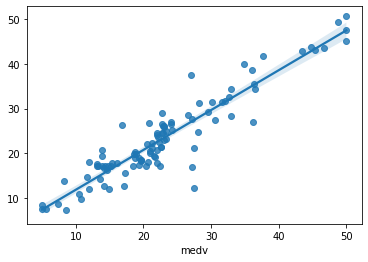

In [62]:
# plot correlation
import seaborn as sb 

sb.regplot(x=y_test, y=y_pred)